In [82]:
import psycopg2
import pandas as pd

In [83]:
df = pd.read_csv("../data/eval_data.csv")

In [84]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,label
count,991221.000000,991221.000000,991221.000000,9.912210e+05,9.912210e+05,991221.000000,991221.000000,991221.000000,991221.000000,991221.000000,...,991221.000000,991221.000000,991221.000000,991221.000000,991221.000000,991221.000000,991221.00000,27608.000000,991221.000000,991221.000000
mean,165912.183063,8.949485,175.621531,1.383945e-03,4.601033e-03,128.827026,70078.984006,3.179922,7.590552,0.634467,...,0.136407,0.150308,-0.001398,0.746955,0.803031,0.001216,0.04473,390.965720,0.027853,0.072582
std,96153.902413,7.659806,65.784928,1.013962e+00,1.097838e+00,50.494392,40602.196512,1.051726,1.956359,0.481580,...,0.543356,0.546012,0.304515,0.987243,0.992801,1.207246,0.20671,883.126764,0.164550,0.350741
min,28.000000,0.000000,2.000000,-1.199783e+01,-7.198298e+00,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.024490,0.000000,0.000000,-0.008621,0.00000,0.000000,0.000000,0.000000
25%,82529.000000,4.000000,100.000000,-5.684420e-15,1.158557e-15,76.000000,35010.000000,3.000000,7.000000,0.000000,...,0.000000,0.000000,-0.024490,0.000000,0.000000,-0.008621,0.00000,124.047500,0.000000,0.000000
50%,165404.000000,4.000000,219.000000,-5.684420e-15,1.158557e-15,162.000000,69615.000000,3.000000,8.000000,1.000000,...,0.000000,0.000000,-0.024490,0.000000,0.000000,-0.008621,0.00000,219.255000,0.000000,0.000000
75%,249335.000000,13.000000,219.000000,-5.684420e-15,1.158557e-15,162.000000,105142.000000,4.000000,9.000000,1.000000,...,0.000000,0.000000,-0.024490,2.000000,2.000000,-0.008621,0.00000,432.755000,0.000000,0.000000
max,332782.000000,33.000000,230.000000,1.040248e+01,7.264442e+01,171.000000,140821.000000,5.000000,10.000000,1.000000,...,3.000000,3.000000,58.697898,3.000000,3.000000,447.275022,1.00000,115309.140000,1.000000,2.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991221 entries, 0 to 991220
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   srch_id                      991221 non-null  int64  
 1   date_time                    991221 non-null  object 
 2   site_id                      991221 non-null  int64  
 3   visitor_location_country_id  991221 non-null  int64  
 4   visitor_hist_starrating      991221 non-null  float64
 5   visitor_hist_adr_usd         991221 non-null  float64
 6   prop_country_id              991221 non-null  int64  
 7   prop_id                      991221 non-null  int64  
 8   prop_starrating              991221 non-null  int64  
 9   prop_review_score            991221 non-null  int64  
 10  prop_brand_bool              991221 non-null  int64  
 11  prop_location_score1         991221 non-null  float64
 12  prop_location_score2         991221 non-null  float64
 13 

In [86]:
# Filter out columns without NaN values
nan_count = df.isnull().sum()
nan_percentage = (nan_count / len(df)) * 100
nan_count = nan_count[nan_count > 0]
nan_percentage = nan_percentage[nan_percentage > 0]

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'NaN Count': nan_count,
    'NaN Percentage': nan_percentage
})

print(result_df)

                    NaN Count  NaN Percentage
gross_bookings_usd     963613       97.214748


In [80]:
# Get data types of all columns
column_types = df.dtypes

# Identify categorical columns based on criteria and print unique values
for column in column_types.index:
    if column_types[column] == 'object' or column_types[column] == 'category' or column_types[column] == 'bool':
        unique_values = df[column].unique()
        print(f"{column}: {unique_values}")
    elif len(df[column].unique()) < 20:  # You can adjust the threshold for unique values
        unique_values = df[column].unique()
        print(f"{column}: {unique_values}")

date_time: ['2013-04-04 08:32:15' '2012-12-31 08:59:22' '2013-06-05 12:27:51' ...
 '2013-03-03 15:12:59' '2013-06-18 14:35:24' '2013-06-30 19:55:18']
prop_starrating: [3 4 2 5 0 1]
prop_review_score: [ 7  8  9  1  6  5  4 10  3  0  2]
prop_brand_bool: [1 0]
promotion_flag: [0 1]
srch_adults_count: [ 2.35999182 -1.13214854  0.03189825  1.19594503  7.01617897  3.52403861
  5.85213218  4.6880854   8.18022576]
srch_children_count: [-0.47789415  0.89247806  2.26285028  3.6332225   6.37396694  5.00359472
  7.74433916 10.4850836   9.11471138 11.85545582]
srch_room_count: [-0.26122986  2.09643032  4.4540905   6.81175068 16.24239141  9.16941087
 11.52707105 13.88473123]
srch_saturday_night_bool: [1 0]
random_bool: [1 0]
comp1_rate: [0 2 3 1]
comp1_inv: [0 2 3 1]
comp2_rate: [2 0 1 3]
comp2_inv: [2 0 3 1]
comp3_rate: [2 1 0 3]
comp3_inv: [2 0 3 1]
comp4_rate: [0 3 2 1]
comp4_inv: [0 2 3 1]
comp5_rate: [2 0 3 1]
comp5_inv: [2 3 0 1]
comp6_rate: [0 3 1 2]
comp6_inv: [0 2 3 1]
comp7_rate: [0 3 2 1]

In [74]:
srch_id_sizes = df.groupby('srch_id').size()
display(srch_id_sizes)
display(srch_id_sizes.min())

srch_id
1         28
4         32
6          5
8         21
11        33
          ..
332777    32
332781    15
332782    24
332784    28
332785     6
Length: 199795, dtype: int64

5

In [32]:
# Filter the groups where both click_bool and booking_bool are not true
no_click_booking = df.groupby('srch_id').filter(lambda x: not any(x['click_bool']) and not any(x['booking_bool']))

# Get the srch_id of these groups
srch_ids_no_click_booking = no_click_booking['srch_id'].unique()

print("Search IDs with no click_bool and booking_bool as true:", srch_ids_no_click_booking)

Search IDs with no click_bool and booking_bool as true: []


In [33]:
# Filter the groups where both click_bool and booking_bool are not true
only_click_booking = df.groupby('srch_id').filter(lambda x: any(x['click_bool']) and not any(x['booking_bool']))

# Get the srch_id of these groups
srch_ids_only_click_booking = only_click_booking['srch_id'].unique()

print("Search IDs with only click_bool true:", srch_ids_only_click_booking)

Search IDs with only click_bool true: [     4     11     12 ... 332752 332765 332777]


In [34]:
# Group by 'srch_id' and count occurrences of booking_bool being true in each group
booking_bool_counts = df.groupby('srch_id')['booking_bool'].sum()

# Filter groups where booking_bool is true more than 2 times
groups_with_more_than_2_bookings = booking_bool_counts[booking_bool_counts > 2]

if not groups_with_more_than_2_bookings.empty:
    print("There are groups with more than 2 booking_bool as true:")
    print(groups_with_more_than_2_bookings)
else:
    print("There are no groups with more than 2 booking_bool as true.")

There are no groups with more than 2 booking_bool as true.


In [81]:
# Calculate distinct values count per column
distinct_count = df.nunique(dropna=False)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Distinct Values Count': distinct_count
})

# Sort the DataFrame by distinct values count in descending order
result_df = distinct_count.sort_values(ascending=True).reset_index()
result_df.columns = ['Column', 'Distinct Values Count']

display(result_df)

,Column,Distinct Values Count
0,prop_brand_bool,2
1,booking_bool,2
2,promotion_flag,2
3,random_bool,2
4,srch_saturday_night_bool,2
5,click_bool,2
6,label,3
7,comp1_inv,4
8,comp2_rate,4
9,comp8_inv,4


In [52]:
# Define a function to assign target values based on booking_bool and click_bool
def assign_target(row):
    if row['booking_bool'] == 1:
        return 2  # Target is 2 if booking_bool is true
    elif row['click_bool'] == 1:
        return 1  # Target is 1 if click_bool is true but booking_bool is false
    else:
        return 0  # Target is 0 otherwise

# Apply the function to create a new column 'target'
df['target'] = df.apply(assign_target, axis=1)

Text(0.5, 1.0, 'variables_pearson_correlation')

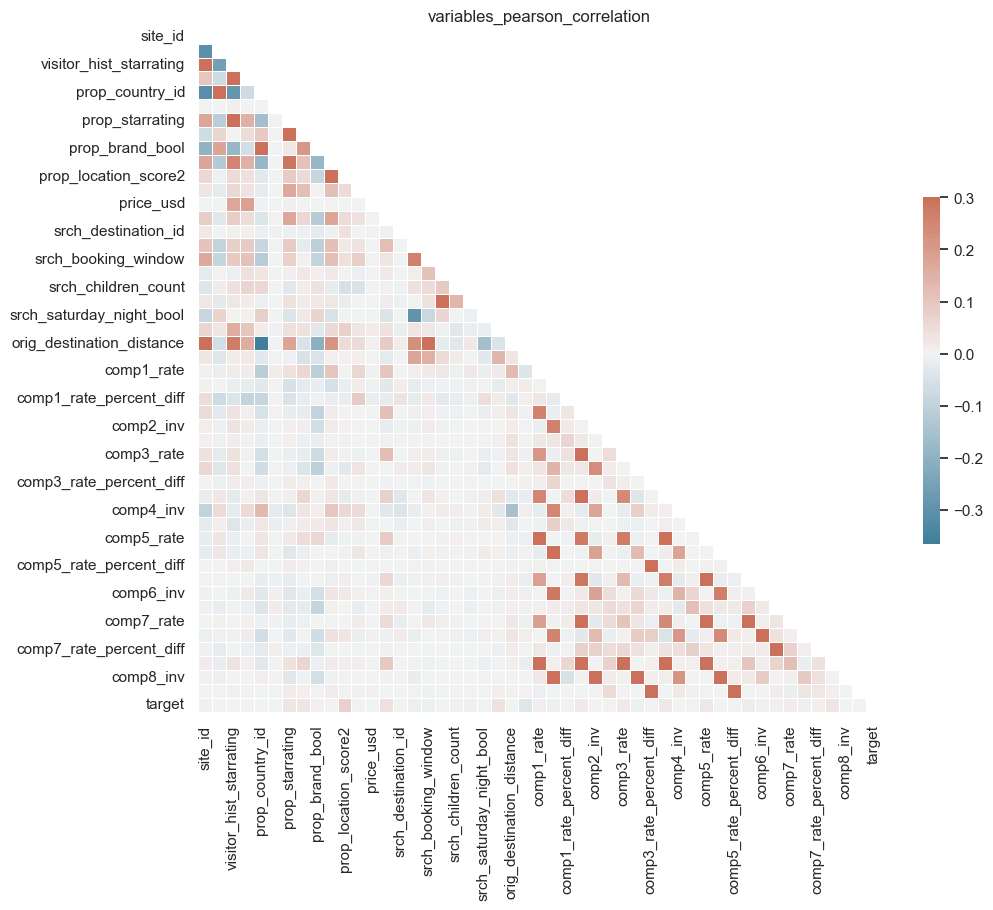

In [54]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_drop = ["srch_id", "date_time", "position", "booking_bool", "click_bool", "gross_bookings_usd"]

df_ = df.copy()
df_.drop(columns_to_drop, axis=1, inplace=True)
df_.head()
sns.set_theme(style="white")

corr = df_.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("variables_pearson_correlation")

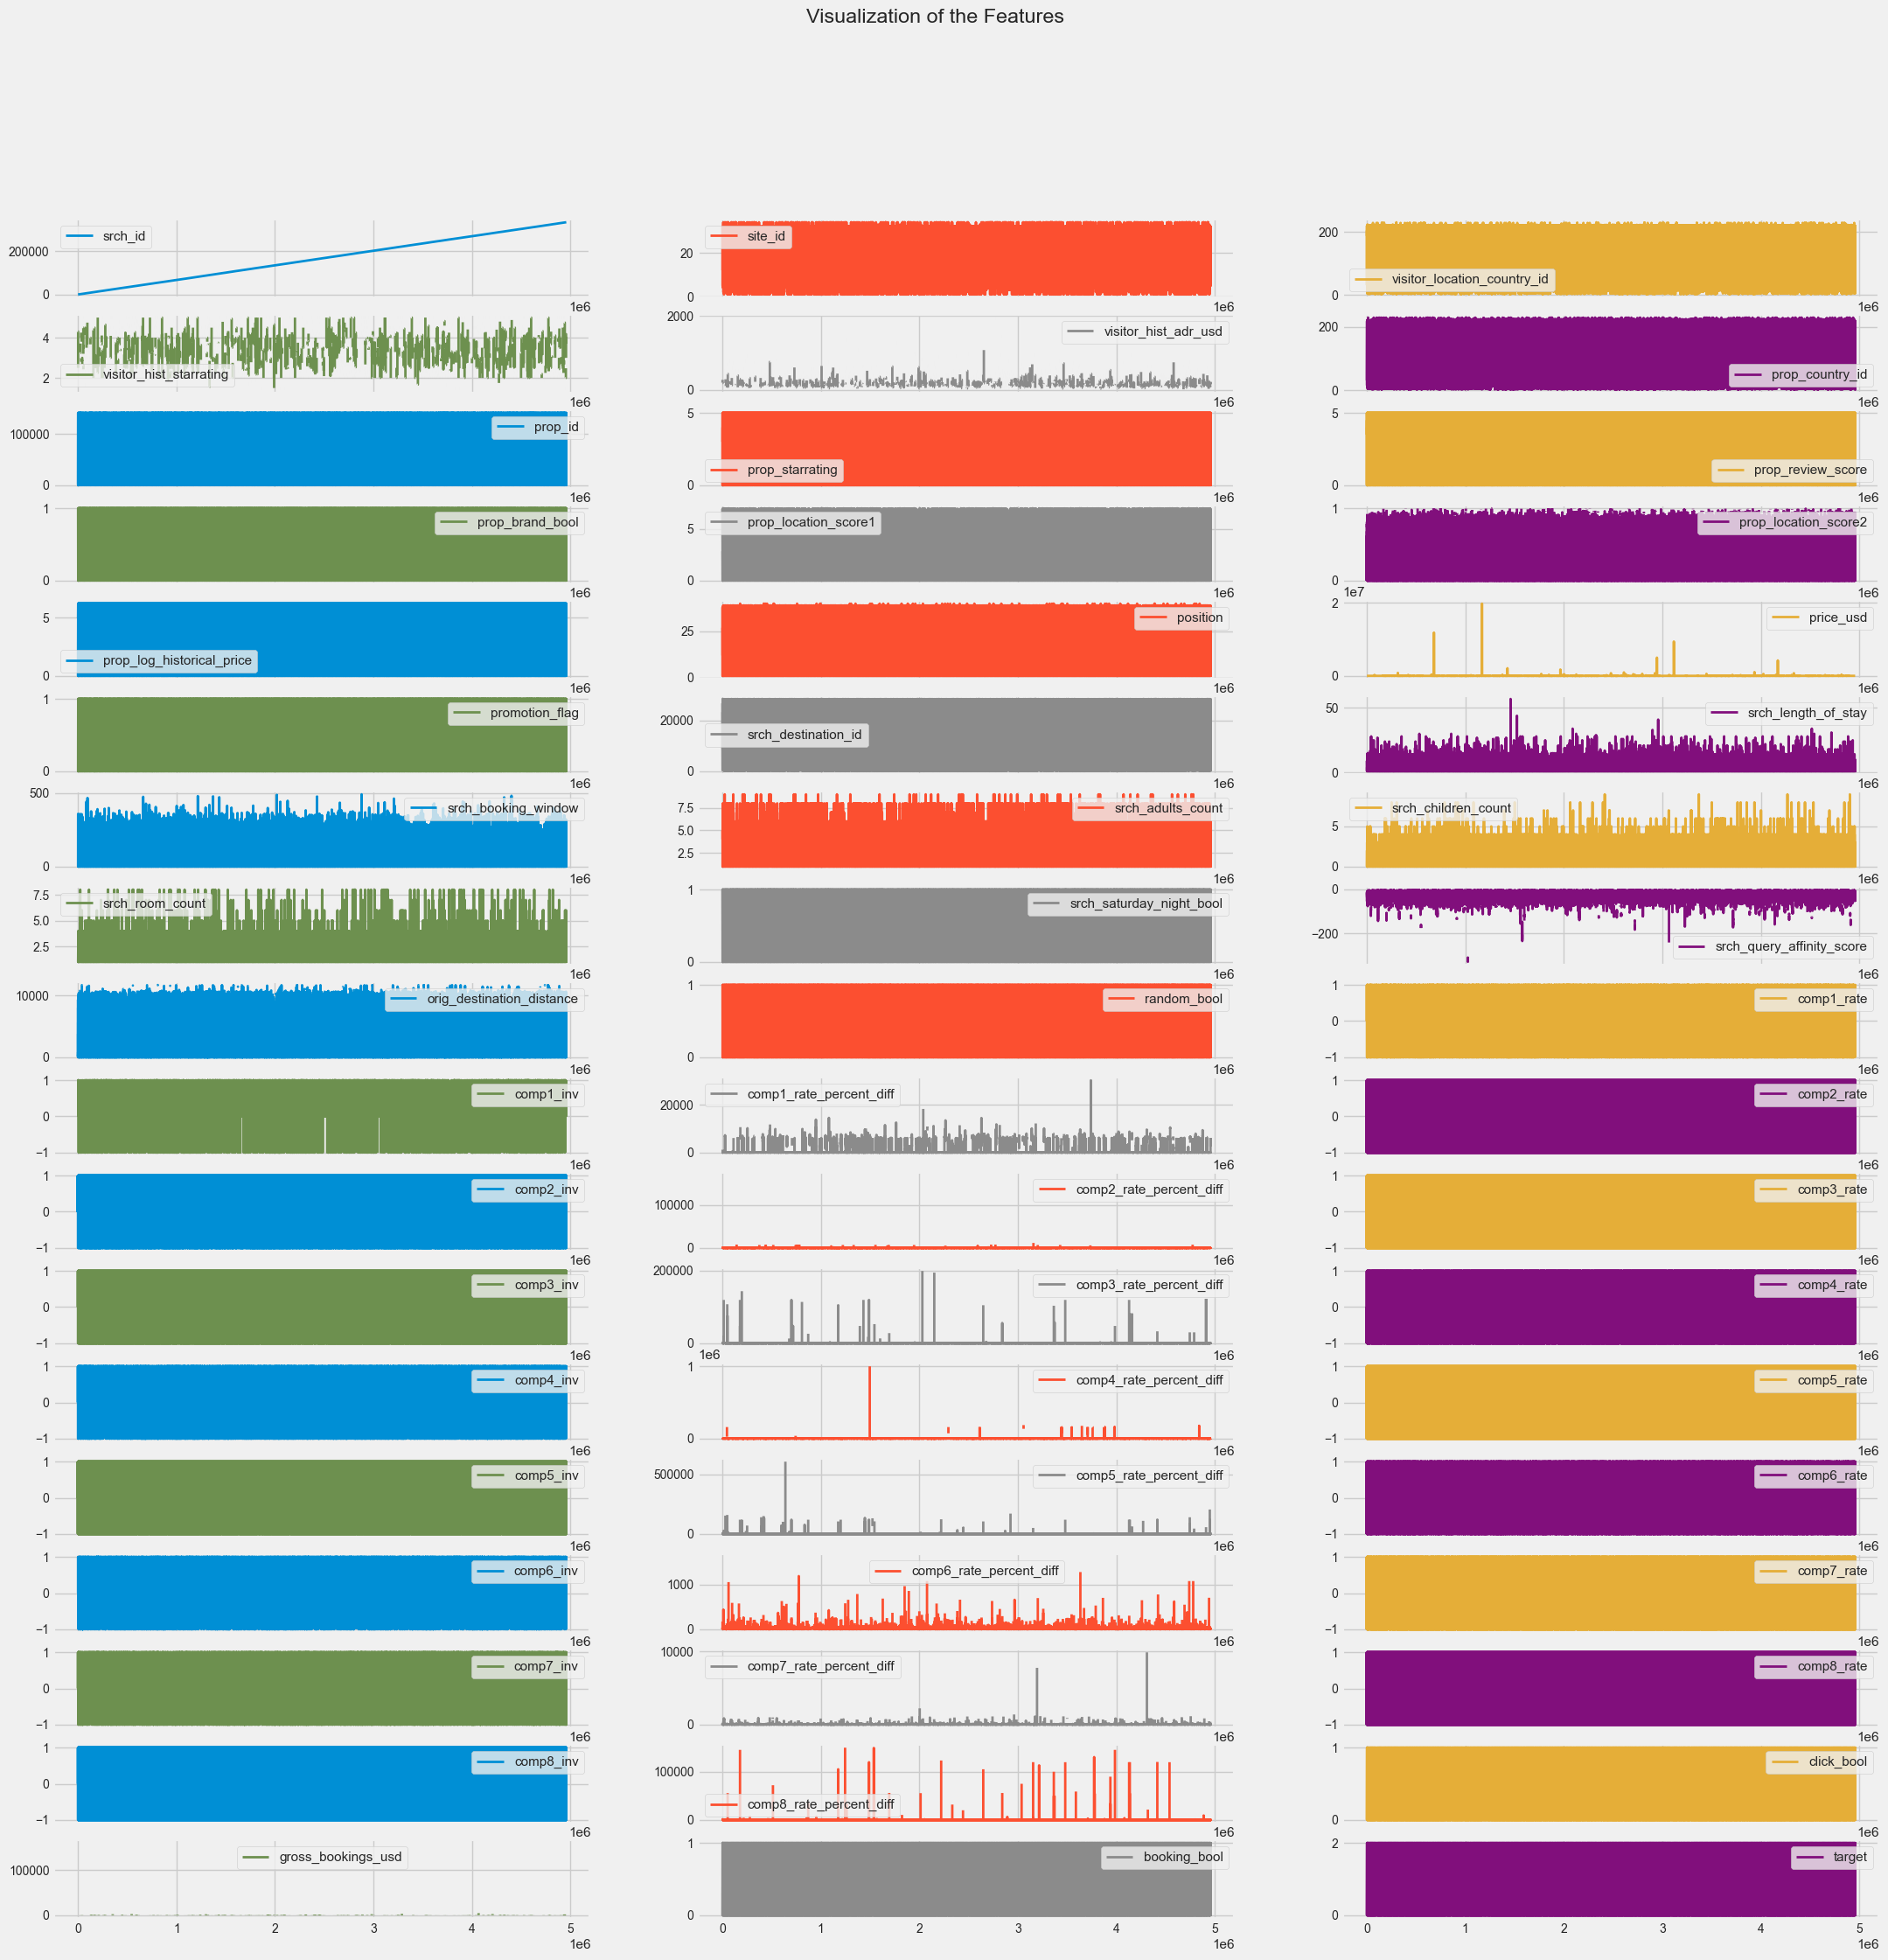

In [56]:
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
                  layout=(18, 3),
                  figsize=(24,24),
                  fontsize=10, 
                  linewidth=2, 
                  title='Distribution of the Features')
plt.show()